# Building a Random Forest Model

---
Topics

*   1. Splitting data
*   2. Create and Train Random Forest Model
*   3. Evaluating the Model
*   4. Visualize Classification Error
*   5. Feature Importance
*   6. Bad Classification

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
# Convert to a DataFrame for easier viewing
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


We’ll use the Iris dataset, which is built into scikit-learn.
It contains 150 samples of flowers, each described by 4 features (like petal length and width), and labeled as one of 3 species.

#1. Splitting Data


In [ ]:
# We'll use 80% of the data for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

When training a machine learning model, we need to check how well it performs on data it hasn’t seen before.
That’s why we split our dataset into two parts:

Training set: Used to teach the model the patterns in the data.

Test set: Used to evaluate how well the model can generalize to new examples.

If we trained and tested on the same data, the model could just memorize the answers —
this is called overfitting, and it means the model won’t work well on new data in the real world.

In this case:

80% is used to train the model

20% is kept aside to test how well it generalizes to new data


#2. Create and Train Random Forest Model

In [ ]:
# n_estimators = number of trees
# random_state = for reproducible results
#model = RandomForestClassifier(n_estimators=100,max_depth = 8, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, random_state=42)

We’ll create a RandomForestClassifier with 100 trees.
Each tree learns slightly different patterns due to randomness (bagging).
Then we train it on the training data.

Depth refers to how many layers of decisions (splits) there are from the root to the leaves in a tree. When defualt it runs the max amount per dataset

In [ ]:
y_pred = model.predict(X_test)

Now that the model is trained, we’ll ask it to predict the flower types for the test data.

#3. Evaluating the Model

We’ll measure how accurate the predictions are using:

Accuracy Score: Overall percent of correct predictions

Classification Report: Precision, recall, and F1 score for each class

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [ ]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



We’ll measure how accurate the predictions are using:

Accuracy Score: Overall percent of correct predictions

Classification Report: Precision, recall, and F1 score for each class

Accuracy: 100% of test samples were correctly classified.

Precision, Recall, F1-score: All are 1.00 for every class, meaning the model made no mistakes.

Support: Shows the number of test samples per class.

Takeaway: The model perfectly classified all Iris flowers. While this is excellent, remember that perfect performance is rare on real-world datasets—always check for overfitting and generalization to new data.

#4. Visualize Classification Error

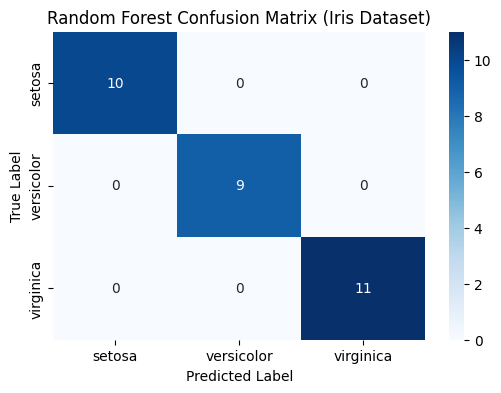

In [ ]:
#Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Random Forest Confusion Matrix (Iris Dataset)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

The confusion matrix shows where the model got predictions right or wrong for each flower type.

#5. Feature Importance

In [ ]:
importances = model.feature_importances_
feature_names = iris.feature_names

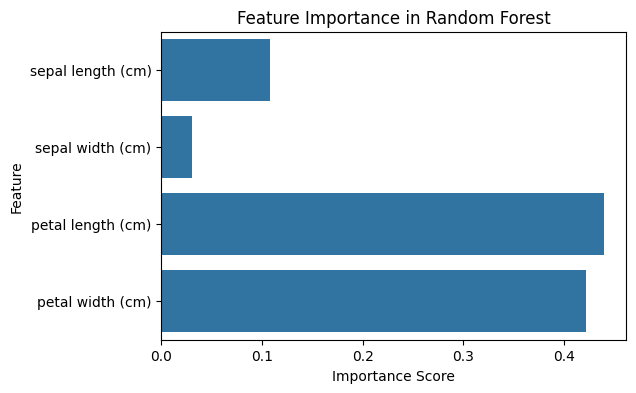

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

Random Forests can show which features were most helpful for making decisions.
Higher bars mean that feature was more important when splitting the data across the trees.

#6. Bad Classification

Lets say we change one of the parameters, for example n_estimators, what do you think would happen to accuracy?

In [ ]:
# Train a weaker Random Forest to illustrate misclassifications
weak_model = RandomForestClassifier(n_estimators=2, max_depth=2, random_state=42)
weak_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=2, random_state=42)

In [ ]:
# Predict on the test set
y_pred_weak = weak_model.predict(X_test)

In [ ]:
# Evaluate accuracy and show classification report
print("Accuracy with weak model:", accuracy_score(y_test, y_pred_weak))
print("\nClassification Report (weak model):\n")
print(classification_report(y_test, y_pred_weak, target_names=iris.target_names))

Accuracy with weak model: 0.9666666666666667

Classification Report (weak model):

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Accuracy: 96.7% of test samples were correctly classified.

The model correctly classified 29 out of 30 test samples

Precision: Most predictions are correct; versicolor has a few false positives.

Recall: Most true samples are captured; virginica missed one sample.

F1-score: High for all classes (0.95–1.00), showing balanced performance.

Takeaway: Even a weaker model performs very well on the simple Iris dataset, but versicolor and virginica show minor misclassifications. This highlights why looking at class-level metrics is important, not just overall accuracy.

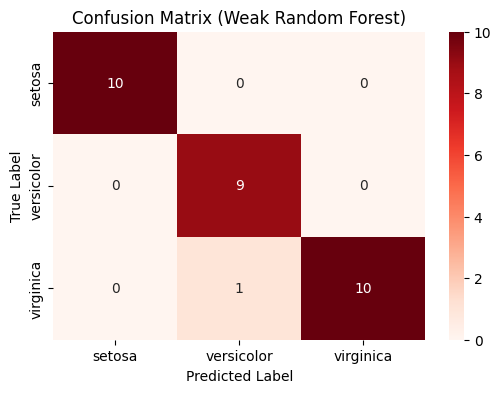

In [85]:
# Visualize the confusion matrix for the weak model
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_weak), annot=True, cmap='Reds', fmt='d',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix (Weak Random Forest)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()